In [2]:
%pip install arch

import yfinance as yf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pyextremes as pyx
from arch import arch_model
from statsmodels.stats.diagnostic import (acorr_ljungbox)
import statsmodels.api as sm




Note: you may need to restart the kernel to use updated packages.


(3822,)
Iteration:      5,   Func. Count:     38,   Neg. LLF: 10072.120970663878
Iteration:     10,   Func. Count:     63,   Neg. LLF: 10070.138356703885
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10070.138356702919
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10070.1
Distribution:                  Normal   AIC:                           20148.3
Method:            Maximum Likelihood   BIC:                           20173.3
                                        No. Observations:                 3821
Date:                Wed, Jun 04 2025   Df Residuals:                     3820
Time

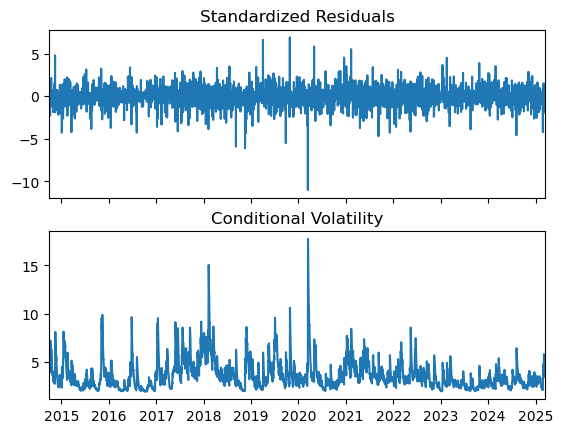

Ljung-Box test on residuals:
    lb_stat  lb_pvalue
1  1.176851   0.277998
Ljung-Box test on squared residuals:
    lb_stat  lb_pvalue
1  0.138303   0.709974
Model is adequate (no remaining ARCH effects).


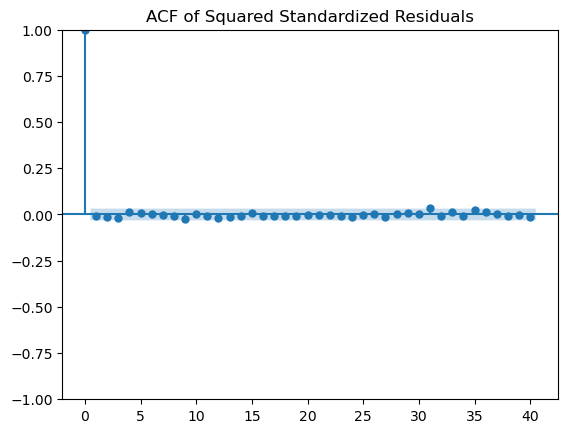

In [5]:
btc_hourly_data = pd.read_csv('btc_daily_data.csv')
btc_hourly_data['Date'] = pd.to_datetime(btc_hourly_data['Date'])
btc_hourly_data.set_index('Date', inplace=True)

# 3. Now extract the 'Close' column — it will carry the datetime index
btc_data = btc_hourly_data['Close'][1000:]
print(btc_data.shape)
# btc_data = yf.download("WMT", start="2008-01-01", end="2013-01-01")['Close'] #S&P 500
log_returns = 100 * np.log(btc_data / btc_data.shift(1)).dropna()

# Step 3: Fit GARCH(1,1) model
model = arch_model(log_returns, vol='Garch', p=1, q=1, mean="Constant")
results = model.fit(update_freq = 5)
print(results.summary())
results.plot()
plt.show()

# Standardized residuals
standardized_resid = results.resid / results.conditional_volatility

# Ljung-Box test (lag 10 as example)
ljung_box = acorr_ljungbox(standardized_resid, lags=1, return_df=True)
print("Ljung-Box test on residuals:")
print(ljung_box)

squared_resid = standardized_resid**2
lb_test_squared = acorr_ljungbox(squared_resid, lags=1, return_df=True)
print("Ljung-Box test on squared residuals:")
print(lb_test_squared)

if lb_test_squared["lb_pvalue"].iloc[0] > 0.05:
    print("Model is adequate (no remaining ARCH effects).")
else:
    print("Model is inadequate (try EGARCH or higher-order GARCH).")

# Step 3: Plot ACF
sm.graphics.tsa.plot_acf(squared_resid, lags=40)
plt.title('ACF of Squared Standardized Residuals')
plt.show()